# Constructing an energy balance model 

In [1]:
#import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Planck response

The <b>energy flux density at the surface of the Earth</b> can be calculated from the inverse square law, given the power of the Sun $3.86$x$10^{26}W$ ($E_S$), and the distance between the Sun and the Earth $1.5$x$10^{11}m$ ($R$): 

$$S_o=\frac{E_S}{4\pi R^{2}}$$

This is the <b>solar constant $S_o$</b>, which is roughly 1365 $Wm^{-2}$.

Energy balance model is crucial in building a climate model, since atmospheric dynamics are driven by the input of energy into the climate system. 

Let's first make several <b>assumptions</b> about the Earth:
1. It is a perfect blackbody
2. Its albedo is 0.3, which is the average terrestrial albedo
3. It is in radiative equilibrium i.e. energy in = energy out
4. Equal solar irradiation on the surface of the Earth

Recall that albedo (α) is the <b>reflectance of an object over all wavelengths</b>, which measures how well a surface reflects EM radiation. 

We already know the energy flux density at the surface of the Earth = the solar constant $S_o$.

Thus, the energy flux density ($Wm^{-2}$) into the Earth is:

$$M_{in}=S_o(1-α)$$ 

In terms of total energy flux ($W$):

$$E_{in}=S_o\pi R_E^2(1-α)$$

where $R_E$ is the radius of the Earth.

The energy flux density emitted is described by Stefan-Boltzmann Law:

$$M_{out}=σ𝑇_K^{4}$$

where σ=<b>Stefan-Boltzmann constant</b>=$5.67$x$10^{-8}Wm^{-2}K^{-4}$, and $T_K$ is <b>absolute temperature</b>. 

In terms of total energy flux:

$$E_{out}=4\pi R_E^2σ𝑇_K^{4}$$

At <b>radiative equilibrium</b>, energy absorbed = energy emitted, thus:

$$E_{in}=E_{out}$$

$$S_o\pi R_E^2(1-α)=4\pi R_E^{2}σ𝑇_K^{4}$$

$$\frac{1}{4}S_o(1-α)=σ𝑇_K^{4}$$ 

Recall $σ𝑇_K^{4}=M_{out}$, thus $\frac{1}{4}S_o(1-α)=M_{in}$.

Rearranging for $T_K$:

$$T_K=(\frac{S_o(1-α)}{4σ})^{\frac{1}{4}}$$

Substituting albedo=0.3, temperature on the surface of the Earth is <b>-18˚C</b>.

In [18]:
# define a function to calculate temperature in degrees Celsius for a given albedo
# al = albedo, s = stefan-boltzmann constant
def find_temp(al, S_o=1365, s=5.67e-8):
    return ((S_o*(1-al))/(4*s))**0.25-273

al = 0.3

print("When albedo = %.1f, surface temperature on Earth would be %.d˚C." % (al, find_temp(al)))

When albedo = 0.3, surface temperature on Earth would be -18˚C.


But the average temperature on Earth should be around <b>14˚C</b>, so something in the model must be wrong.

Actually, some of the assumptions are not valid and are too simple.

#### Assumption 1 

The Earth is not a perfect blackbody, because it doesn't radiate perfectly.

#### Assumption 2 

Albedo = 0.3 is actually pretty accurate. As you'll see below, after accounting for the Earth being an imperfect blackbody, the surface temperature calculated is very sensible.

#### Assumption 3

Equilibrium is easily disturbed, especially by <b>positive feedbacks</b>.

#### Assumption 4 

The Earth is a sphere, so heat absorbtion (and heat emission) is not uniform.

## Emissivity

To improve the model and address assumption 1, <b>emissivity ε</b> is introduced to describe the <b>difference in the range of radiation emitted between the object and an ideal black body</b>.

Including this 'fudge factor', Stefan-Boltzmann Law becomes:

$$M_{out}=εσT_K^{4}$$

Since $M_{in}=M_{out}$,

$$\frac{1}{4}S_o(1-α)=εσT_K^{4}$$

$$T_K=(\frac{S_o(1-α)}{4εσ})^{\frac{1}{4}}$$

It is found that the emissivity of the Earth is 0.62, and substituting this into the equation gives 14˚C, proving that albedo=0.3 is a valid assumption.

Including emissivity, temperature on Earth would be 14˚C.


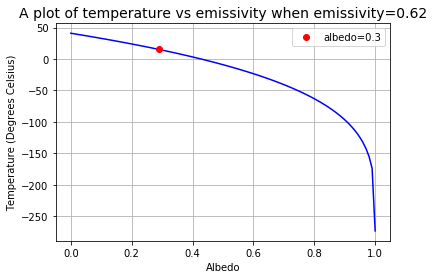

In [22]:
# define a function to find the temperature with a given emissivity
def find_new_temp(al, S_o=1365, e=0.62, s=5.67e-8):
    return ((S_o*(1-al))/(4*e*s))**0.25-273

print("Including emissivity, temperature on Earth would be %.d˚C." % (find_new_temp(0.3)))

# make a list of values of emissivity between 0.01 and 1
albedo = np.array([0.01*i for i in range(101)])

#calculate temperature with emissivity
new_temp = find_new_temp(albedo)

# plot figure
plt.figure(figsize=(6,4))
plt.plot(albedo, new_temp, 'b')
plt.plot(albedo[29], new_temp[29], 'ro', label='albedo=%.1f' % (albedo[29])) 
plt.xlabel('Albedo')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('A plot of temperature vs emissivity when emissivity=0.62', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()

## Greenhouse effect

To include greenhouse effect into the model, let's first use binomial expansion on the equation linking absolute temperature ($T_K$), temperature in degrees Celsius ($T_C$), and conversion constant from degrees Celsius to Kelvin ($T_o=273$).

$$T_K=(T_o+T_C)$$

Recall that binomial expansion is $(1+x)^{n}≈(1+nx)$ when x<<1:

$$T_K^4≈T_o^4(1+4\frac{T_C}{T_o})$$

Substitute $T_K$ and including emissivity into Stefan-Boltzmann Law:

$$M_{out}=εσ(T_o^4(1+4\frac{T_C}{T_o}))$$

$$=a+bT_C$$

a is the constant coefficient for longwave radiation $= εσT_o^{4}=195Wm^{-2}$

b is temperature-dependent coefficient for longwave radiation $= 4εσT_o^{3}=2.9Wm^{-2}˚C^{-1}$

Since $M_{in}=M_{out}$,

$$\frac{1}{4}S_o(1-α)=a+bT_C$$

$$T_C=\frac{\frac{1}{4}S_o(1-α)-a}{b}$$

As you can see below, for the same set of values of albedo, the temperature now is higher. In the case for albedo=0.3, temperature becomes 15˚C.

Accounting for greenhouse effect, temperature on Earth would be 15˚C.


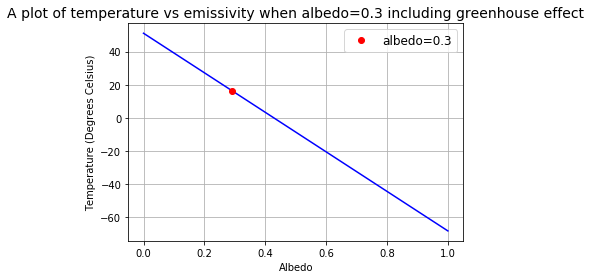

In [23]:
# define function for calculating T_C with a given emissivity
def find_TC(al, s=5.67e-8, T_o=273, S_o=1365, e=0.62):
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (0.25*S_o*(1-al)-a)/b

print("Accounting for greenhouse effect, temperature on Earth would be %.d˚C." % (find_TC(0.3)))

# make a list of albedo between 0 and 1
al = np.array([0.01*i for i in range(101)])
T_C = find_TC(al)

# plot figure
plt.figure(figsize=(6,4))
plt.plot(al, T_C, 'b')
plt.plot(al[29], T_C[29], 'ro', label='albedo=%.1f' % (al[29])) 
plt.xlabel('Albedo')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('A plot of temperature vs emissivity when albedo=0.3 including greenhouse effect', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()

We can rewrite the equation above as:

$$T_C = \frac{M_{in}-a}{b} = \frac{M_{in}}{b}-\frac{a}{b}$$

$$∆T_C = \frac{∆M_{in}}{b}$$

$∆M_{in}$ is the <b>radiative forcing</b> of a greenhouse gas, the increase in energy flux density caused by that particular greenhouse gas. 

The radiative forcing associated with CO$_{2}$ gas of concentration [CO$_2$] compared to a base level concentration ot [CO$_2$]$_0$ can be approximated by:

$$∆M_{CO_2,in} = 5.35ln(\frac{[CO_2]}{[CO_2]_0})$$

For a doubling of CO$_2$, the radiative forcing would be:

$$∆M_{CO_2,in} = 5.35ln(2) = 3.7 Wm^{-2}$$

Thus, when CO$_2$ doubles, $∆T_{CO2} = \frac{3.7}{b} = \frac{3.7}{2.9} ≈ 1˚C$

This is <b>climate sensibility</b>, the change in temperature caused by doubling CO$_2$ concentration compared to a base level. In the study of climate change, this base level is pre-industrial CO$_2$ concentration of 280ppm.

When CO2 concentration reaches 560ppm, double that of pre-industrial level, temperature increases by 1˚C.


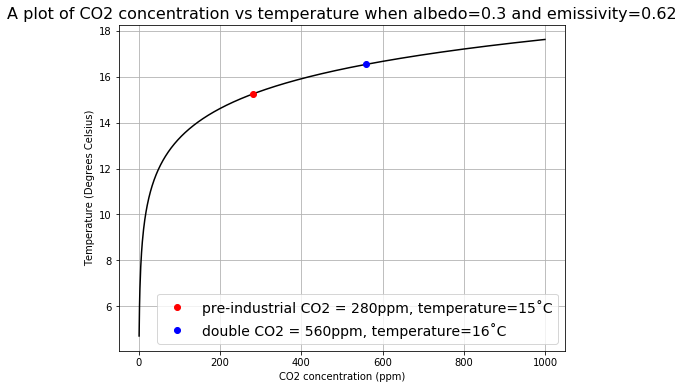

In [25]:
def find_newT(CO2_now, CO2_initial=280, e=0.62, s=5.67e-8, T_o=273, S_o=1365, al=0.3):
    dM = 5.35 * np.log(CO2_now/CO2_initial)
    M = 0.25*S_o*(1-al) + dM
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (M - a) / b

CO2_now = np.array([i for i in range(1,1000)])
temp_now = find_newT(CO2_now)

print("When CO2 concentration reaches 560ppm, double that of pre-industrial level, temperature increases by %.d˚C." 
      % (temp_now[559]-temp_now[279]))

plt.figure(figsize=(8,6))
plt.plot(CO2_now, temp_now, 'k')
plt.plot(CO2_now[279], temp_now[279], 'ro', label='pre-industrial CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[279], temp_now[279]))
plt.plot(CO2_now[559], temp_now[559], 'bo', label='double CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[559], temp_now[559]))
plt.xlabel('CO2 concentration (ppm)')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('A plot of CO2 concentration vs temperature when albedo=0.3 and emissivity=0.62', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

## Storing heat 

Given that most of the temperature change is due to the heat exchange with the top 70m layer of the ocean, we'll assume the contribution from land and deep ocean to heat storage is negligible, and that the ocean is 70m deep.

Given that the density of seawater $ρ=1025kgm^{-3}$, specific heat capacity of water $c=4200Jkg^{-1}˚C^{-1}$, the fraction ($f$) which the Earth's surface is covered by ocean (70%), and depth of the ocean ($d$), we can calculate the heat capacity of the ocean per meter squared, which is the energy required to increase the temperature of one square metre of the ocean by 1 degrees Celsius:

$$C=fρdc$$

You can verify this by looking at the units.

Substituting in the numbers, the heat capacity of the ocean per metre squared is $2.11*10^8 Jm^{-2}˚C^{-1}$

In [2]:
f = 0.7 # %
p = 1025 # kg/m3
d = 70 # m
c = 4200 # J/kg˚C

print("Heat capacity of the ocean per metre squared = %.2e J/m2˚C" % (f*p*d*c))

Heat capacity of the ocean per metre squared = 2.11e+08 J/m2˚C


## Restoring equilibrium

From the first law of thermodyamics, the rate of change in temperature must be balanced by the net rate of heating or cooling.

$$M_{in}-M_{out}=\frac{1}{4}S_o(1-α)-(a+bT_C)$$ 

The change in temperature per unit area per unit time is $C\frac{dT}{dt}$ (verify this by units).

Therefore:

$$C\frac{dT}{dt}=\frac{1}{4}S_o(1-α)-(a+bT_C)$$

Since T_C is merely a specific value of T:

$$C\frac{dT}{dt}=\frac{1}{4}S_o(1-α)-(a+bT)$$

The solution to the ODE is:

$$T=\frac{\frac{1}{4}S_o(1-α)-a-CDe^{-\frac{b}{C}t}}{b}$$

where D is a constant based on initial conditions:

$$D=\frac{\frac{1}{4}S_o(1-α)-a-bT_{t=0}}{C}$$

## Ice-albedo positive feedback - tipping points

Assume that due to some perturbation: 
- the average temperature becomes lower than -10˚C, then albedo of the Earth is 0.9 due to ice globally
- the average temperature is between -10˚C and 10˚C, then the albedo is between 0.3 and 0.9, and this can be calculated by using ratios:

$$α=α_{ice}-(α_{ice}-α_{land})\frac{T_{now}-T_{freeze}}{T_{melt}-T_{freeze}}$$

- the average temperare becomes higher than 10˚C, then the entire Earth's ice melts, albedo becomes 0.3

When a critical temperature is reached, any slight change will lead to a shift in equilibrium temperature. This critical temperature is called a tipping point. In this case, the tipping point is between 7˚C and 8˚C.

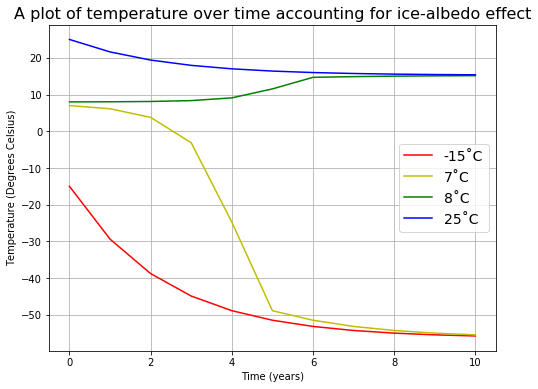

In [30]:
# define a function to calculate temp over time
def equilibrium_T(T_initial, years, e=0.62, C=2.11e8, S_o=1365, s=5.67e-8, T_o=273):
    temp = [T_initial]
    time = [0]
    t = 0
    while t < years:
        t += 1
        time.append(t)
        seconds = t * 3600 * 24 * 365.25 # convert years to seconds
        # ice albedo feedback
        if temp[-1] <= -10:
            al = 0.9
        elif temp[-1] >= 10:
            al = 0.3
        else:
            al = 0.9 - (0.9 - 0.3) * (temp[-1] + 10) / (20)
        a = e * s * T_o**4
        b = 4 * e * s * T_o**3
        # substitute into differential equation
        D = (0.25*S_o*(1-al)-a-T_initial*b)/C
        temp.append((1/b)*(0.25*S_o*(1-al)-a-C*D*np.exp(-b*seconds/C)))
    return time, temp

time_minus15, temp_minus15 = equilibrium_T(-15, 10)
time_7, temp_7 = equilibrium_T(7, 10)
time_8, temp_8 = equilibrium_T(8, 10)
time_25, temp_25 = equilibrium_T(25, 10)

# plot figure
plt.figure(figsize=(8,6))
plt.plot(time_minus15, temp_minus15, 'r', label='-15˚C')
plt.plot(time_7, temp_7, 'y', label='7˚C')
plt.plot(time_8, temp_8, 'g', label='8˚C')
plt.plot(time_25, temp_25, 'b', label='25˚C')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('A plot of temperature over time accounting for ice-albedo effect', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

## Final model

Now, let's include all the concepts above into this final model.

Note that CO$_2$ is the only greenhouse gas considered, and the initial conditions are set to temperature of 14˚C and CO$_2$ concentration of 280ppm.

How many projections do you want to make? 5
How many years do you want to project into the future? 20
Please enter final CO2 concentration for projection 1 in ppm: 16
Please enter final CO2 concentration for projection 2 in ppm: 17
Please enter final CO2 concentration for projection 3 in ppm: 280
Please enter final CO2 concentration for projection 4 in ppm: 560
Please enter final CO2 concentration for projection 5 in ppm: 1000


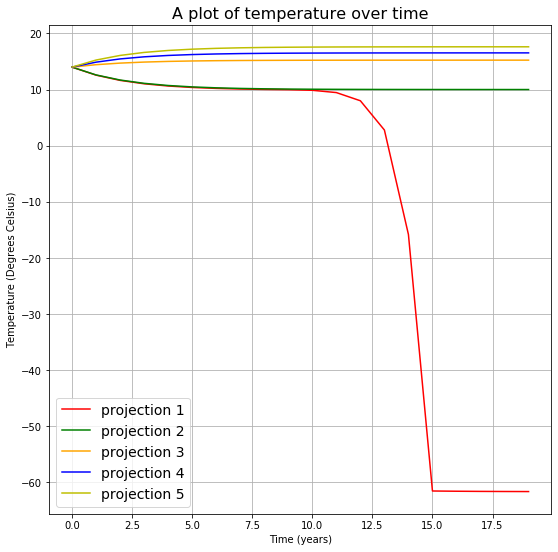

In [27]:
def simple_model(final_co2, years, current_temp=14, current_co2=280, e=0.62, S_o=1365, T_o=273, s=5.67e-8, f=0.7, d=70, p=1025, c=4200):
    temperature = [14] # store initial and calculated temperature into a list
    t = 0 # counter
    total_t = years # counter limit
    al = 0.3 # initial albedo
    dM = 5.35 * np.log(final_co2/current_co2)
    C = 2.11e8
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    while t < total_t:
        t += 1
        seconds = t * 3600 * 24 * 365.25 # convert years to seconds
        # ice albedo effect + tipping point
        if temperature[-1] <= -10:
            al = 0.9
        elif temperature[-1] >= 10:
            al = 0.3
        else:
            al = 0.9 - (0.9-0.3)*(temperature[-1]+10)/(20)
        M = 0.25*S_o*(1-al) + dM
        # substitute into differential equation
        D = (M-a-current_temp*b)/(C)
        temp = ((1/b)*(M-a-C*D*np.exp(-b*seconds/C)))
        temperature.append(temp)
    return temperature # output temperature list



# ask user for input
num = int(input("How many projections do you want to make? "))

    
time = int(input("How many years do you want to project into the future? ")) 

all_CO2_conc = [] 

for i in range(num): # ask user for CO2 concentration
    CO2_conc = int(input("Please enter final CO2 concentration for projection %.d in ppm: " % (i+1)))
    all_CO2_conc.append(CO2_conc) # add user input into list


projections = {} # create dictionary to store temperature data over time
for i in range(len(all_CO2_conc)):
    projections['CO2 concentration='+str(all_CO2_conc[i])]=[]
    for j in range(time):
        projections['CO2 concentration='+str(all_CO2_conc[i])].append(simple_model(all_CO2_conc[i], time)[j])
 
t = np.array([i for i in range(time)]) # make an array of years for plotting

colour = ['r', 'g', 'orange', 'b', 'y', 'purple', 'c', 'm', 'k'] # create a list of colours to choose from


# plot figure
plt.figure(figsize=(9,9))
for i in range(len(all_CO2_conc)):
    plt.plot(t, projections['CO2 concentration='+str(all_CO2_conc[i])], colour[i], label='projection %.d' % (i+1))
plt.xlabel('Time (years)')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('A plot of temperature over time', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()

## Conclusion

This model is still very crude, since plenty of things are still not taken into account, such as clouds, position of continents, vegetation, etc. In a real climate model, other factors also have to be included such as atmospheric dynamics, climate variability, human activity, etc. 

However, this example shows how scientists build climate models by using equations from physics, making approximations and assumptions, including parameters or other equations to account for any variability, and adjusting the values of parameters so that it resembles the real world every time it is run.

### References

- Lecture 1 practical and teaching materials in the Climate module
-  __[Penn State](https://www.e-education.psu.edu/meteo469/node/135)__
-  __[New York University Maths Department](https://math.nyu.edu/faculty/kleeman/zero_dim_ebm.html)__
- __[Myhre et al.](https://en.wikipedia.org/wiki/Planck%27s_law)__